# Netflix Movies and TV shows clustering 

#### Project Type - Unsupervised learning 
#### This is individual Project 

### Project Summary 

### Problem statement 
Netflix, is an American subscription streaming service and production company. It was founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California.

It offers a library of films and television series through distribution deals as well as its own productions, known as Netflix Originals.

Our objective is to do the analysis on Netflix data using Unsupervised Machine learning Algorithms like applying different clustering methods to understand what content is available in different countries and if Netflix has been increasingly focusing on TV rather than movies in recent years. And use these insights to cluster similar content by matching text-based features.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings

After loading the data, we start by observing the first and last five values to understand the dataset. Next, we treat the null values by dropping them if the respective variables contain <1% of null values. This is followed by feature engineering to extract new variables from the datetime variable date_added.

This cleaned data is then used to conduct EDA in order to understand it better and identify the underlying trends. After EDA we visualize through plotting charts and observe meaningful insights from these charts.

Once obtained the required insights from the EDA, we start with Pre-processing the text data by removing the punctuation, and, stop words. This filtered data is passed through TF - IDF Vectorizer since we are conducting a text-based clustering and the model needs the data to be vectorized in order to predict the desired results. Then, Dimensionality Reduction can be applied using (PCA) Principal Component Analysis and Data Scaling using Standard Scaling technique or minmax scaling.

Finally, K–Means clustering is utilized to form 10 distinct clusters with similar data points.Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. The Elbow Curve is one of the most popular methods to determine this optimal value of k.

And after this hierarchical and agglomerative clustering is done on the cleaned data and dendrogram will be plotted.
This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search.




###  Buisness objective 
Exploratory Data Analysis

Understanding what type content is available in different countries

Is Netflix has increasingly focusing on TV rather than movies in recent years.

Clustering similar content by matching text-based featuresAnswer Here.

### Attribute information 
show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Releaseyear of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genere

description: The Summary description

### 1. Know your data 

#### Import Libraries 

In [1]:
# Importing libraries that we will need 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer 

""" importing NLTK to  perform NLP tasks.
like tokenizing text into individual words, parts of speeach tagging, 
Noun phase extraction, etc """

from textblob import TextBlob 
import scipy.stats as stats 
from sklearn.decomposition import TruncatedSVD #for dimensionality reduction 
from sklearn.decomposition import LatentDirichletAllocation 
from sklearn.manifold import TSNE #for manifold learning, text analysis

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA


%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings("ignore")
     

#### Dataset Loading 

In [3]:
df = pd.read_csv('E:\\# DATA SCIENCE\\CApstone project\\Netflix Movies and TV shows clustering\\Netflix_data.csv')

In [4]:
df_copy = df.copy()

#### Dataset First view 

In [5]:
df_copy

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


This data set contains 7787 rows with 12 attribute like title, director, cast, country, ratings

In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### DataSet Summary 

In [7]:
df_copy.describe(include = 'O'). T

,count,unique,top,freq
show_id,7787,7787,s1,1
type,7787,2,Movie,5377
title,7787,7787,3%,1
director,5398,4049,"Raúl Campos, Jan Suter",18
cast,7069,6831,David Attenborough,18
country,7280,681,United States,2555
date_added,7777,1565,"January 1, 2020",118
rating,7780,14,TV-MA,2863
duration,7787,216,1 Season,1608
listed_in,7787,492,Documentaries,334


#### Missing values 

In [8]:
df_copy.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<AxesSubplot: >

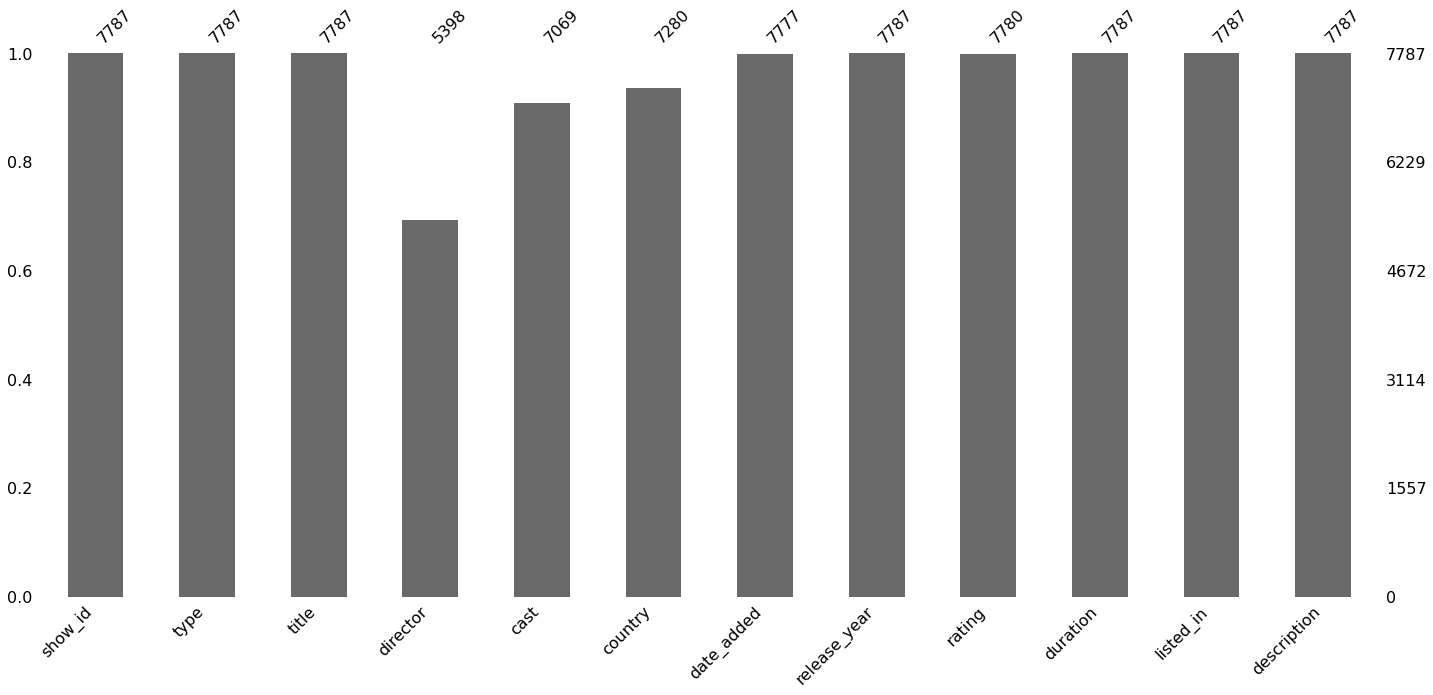

In [9]:
#visualising missing values 
import missingno as msno
msno.bar(df_copy)

##### we can clearly see that director column has most missing number this might due to fact that whoever made this data set missed to put down director names, and all other features which are missing like cast and country are very low 

In [10]:
# handling missing values 
df_copy['director'].fillna('unknown', inplace=True)
df_copy['cast'].fillna('unknown', inplace=True)
df_copy['country'].fillna('unknown', inplace=True)
df_copy['date_added'].fillna('unknown', inplace=True)
df_copy['rating'].fillna('unknown', inplace=True)

### What did you know about your dataset?

Each row contains the following information: type (Movie or TV Show), title, director, cast, country, rating (ex. PG, PG-13, R, etc.), listed_in (genre), and plot description.Answer Here

We have 5 columns with missing values.

* This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search.
* The goal of this project is to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.
* There is a total of 7787 movies / TV shows and 12 columns present in this data set collected from AlmaBetter
* Each row contains the following information: type (Movie or TV Show), title, director, cast, country, rating (ex. PG, PG-13, R, etc.), listed_in (genre), and plot description.
* There are missing values present in director, cast and country columns.We need to remove those missing values by filling NAN values.
* There is no duplicate values present in the dataset. 

## ***. Understanding Your Variables***

In [11]:
# Dataset Columns
df_copy.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe(include = 'O').T

,count,unique,top,freq
show_id,7787,7787,s1,1
type,7787,2,Movie,5377
title,7787,7787,3%,1
director,5398,4049,"Raúl Campos, Jan Suter",18
cast,7069,6831,David Attenborough,18
country,7280,681,United States,2555
date_added,7777,1565,"January 1, 2020",118
rating,7780,14,TV-MA,2863
duration,7787,216,1 Season,1608
listed_in,7787,492,Documentaries,334


### Variables Description 
The dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc

* show_id : Unique ID for every Movie / Tv Show

* type : Identifier - A Movie or TV Show

* title : Title of the Movie / Tv Show

* director : Director of the Movie

* cast : Actors involved in the movie / show

* country : Country where the movie / show was produced

* date_added : Date it was added on Netflix

* release_year : Actual Release Year of the movie / show

* rating : TV Rating of the movie / show

* duration : Total Duration - in minutes or number of seasons

* listed_in : Genre

* description: The Summary description


### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

Insights

* Firstly checked all unique values and observe all unique values in the dataset.
* Checking all the columns present in the dataset and observe that almost all the columns have textual data and having different catrgories of the data.
* Using describe we have seen that maximum value and minimum value and observe that we have only rating as a numerical value in the dataset.

In [14]:
# Write your code to make your dataset analysis ready.
# Converting 'date_added' to Datetime format 

In [15]:
import datetime as dt 

In [16]:
def date(row):
  a = row['date_added']
  if 'unknown' not in a:
    month = a.split()[0]
    year = a.split()[-1]
    day = a.split()[1].split(',')[0]
    a = dt.datetime.strptime(f'{month[:3]} {day} {year}' , '%b %d %Y')
    return a
  else:
    return np.nan

df_copy['date_added'] = df_copy.apply(lambda x: date(x), axis=1)

In [17]:
df_copy['date_added']

0      2020-08-14
1      2016-12-23
2      2018-12-20
3      2017-11-16
4      2020-01-01
          ...    
7782   2020-10-19
7783   2019-03-02
7784   2020-09-25
7785   2020-10-31
7786   2020-03-01
Name: date_added, Length: 7787, dtype: datetime64[ns]

###  FEATURE ENGINEERING for LISTED_IN

FEATURE ENGINEERING LISTED_IN Genres are extracted and re-defined accordingly. TV and Movie genres are separately defined. These are combined. Topics like International TV Shows are removed as it could bring in a bias by displaying content in reference to American movies.

In [18]:
a = df_copy.copy()

In [19]:
a['listed_in'] = a.listed_in.apply(lambda row: row.split(', '))
a.explode('listed_in')['listed_in'].unique()

array(['International TV Shows', 'TV Dramas', 'TV Sci-Fi & Fantasy',
       'Dramas', 'International Movies', 'Horror Movies',
       'Action & Adventure', 'Independent Movies', 'Sci-Fi & Fantasy',
       'TV Mysteries', 'Thrillers', 'Crime TV Shows', 'Docuseries',
       'Documentaries', 'Sports Movies', 'Comedies', 'Anime Series',
       'Reality TV', 'TV Comedies', 'Romantic Movies',
       'Romantic TV Shows', 'Science & Nature TV', 'Movies',
       'British TV Shows', 'Korean TV Shows', 'Music & Musicals',
       'LGBTQ Movies', 'Faith & Spirituality', "Kids' TV",
       'TV Action & Adventure', 'Spanish-Language TV Shows',
       'Children & Family Movies', 'TV Shows', 'Classic Movies',
       'Cult Movies', 'TV Horror', 'Stand-Up Comedy & Talk Shows',
       'Teen TV Shows', 'Stand-Up Comedy', 'Anime Features',
       'TV Thrillers', 'Classic & Cult TV'], dtype=object)

In [20]:
replacing_genre = {'International TV Shows': '-',
                   'TV Dramas': 'Drama',
                   'TV Sci-Fi & Fantasy': 'SciFiFantasy',
                   'Dramas': 'Drama' ,
                   'International Movies': '-',
                   'Horror Movies': 'Horror',
                   'Action & Adventure': 'ActionAdventure',
                   'Independent Movies': '-',
                   'Sci-Fi & Fantasy': 'SciFiFantasy',
                  'TV Mysteries': 'Mystery'       ,
                  'Thrillers': 'Thriller',
                   'Crime TV Shows': 'Crime',
                   'Docuseries': 'Documentary',
                  'Documentaries': 'Documentary', 'Sports Movies': 'Sports',
                   'Comedies':'Comedy',
                   'Anime Series': 'Anime',
                  'Reality TV': 'Reality',
                   'TV Comedies': 'Comedy',
                   'Romantic Movies': 'Romance',
                  'Romantic TV Shows': 'Romance', 
                   'Science & Nature TV': 'Science',
                   'Movies': '-',
                  'British TV Shows': '-',
                   'Korean TV Shows': '-',
                   'Music & Musicals': 'Music',
                  'LGBTQ Movies': 'LGBTQ',
                   'Faith & Spirituality': 'Spirituality', 
                   "Kids' TV": 'Kids',
                  'TV Action & Adventure': 'ActionAdventure',
                   'Spanish-Language TV Shows': '-',
                  'Children & Family Movies': 'Family', 
                   'TV Shows': '-',
                   'Classic Movies': 'Classic',
                  'Cult Movies': 'Cult',
                   'TV Horror': 'Horror',
                   'Stand-Up Comedy & Talk Shows':'Comedy, TalkShow',
                  'Teen TV Shows': 'Teen', 'Stand-Up Comedy':'Comedy', 
                   'Anime Features':'Anime',
                  'TV Thrillers': 'Thriller',
                   'Classic & Cult TV':'Classic, Cult'}

In [21]:
def genre_replace(row, replacing_genre = replacing_genre):
  new_text = []
 
  for word in (row['listed_in']):
    if word in replacing_genre:
      if '-' not in replacing_genre[word]:
       new_text.append(replacing_genre[word])
    else:
      print(word, 'not present in dictionary')

  return(', '.join(new_text))
  

df_copy['Genres'] = a.apply(lambda row: genre_replace(row),axis=1)
df_copy['Genres'] = df_copy['Genres'].apply(lambda row: row.split(', '))

In [22]:
(df_copy.explode('Genres')['Genres'].unique())

array(['Drama', 'SciFiFantasy', 'Horror', 'ActionAdventure', 'Mystery',
       'Thriller', 'Crime', 'Documentary', 'Sports', 'Comedy', 'Anime',
       'Reality', 'Romance', 'Science', '', 'Music', 'LGBTQ',
       'Spirituality', 'Kids', 'Family', 'Classic', 'Cult', 'TalkShow',
       'Teen'], dtype=object)

## EDA

### Type of content on Netflix 

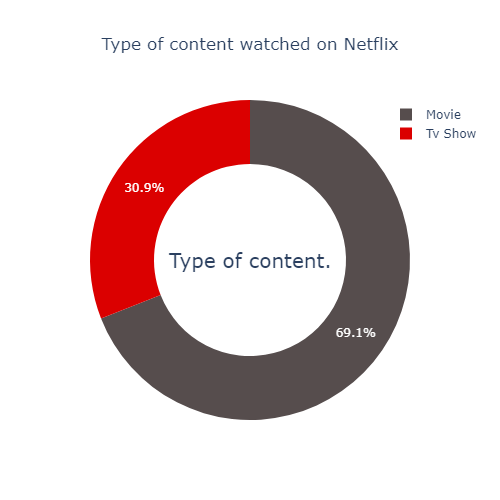

In [23]:
# Create a pie chart for Type.
colors = ['	#db0000', '	#564d4d']
labels = ['Tv Show', 'Movie']
tv_show = df_copy.type.value_counts()[1]
movie = df_copy.type.value_counts()[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=[tv_show, movie], hole=.6)])
fig.update_layout(
    title_text="Type of content watched on Netflix",title_x=0.5, legend=dict(x=0.9),height=500, width=500,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Type of content.', font_size=20, showarrow=False)])
fig.update_traces(marker=dict(colors=colors))

fig.show('png')

#### 69.1% watch movies while 30.9% watch Tv shows 

### Content over month 

In [24]:
#Creating seprate month column in dummy dataframe to see growth of content over the course of month 
import datetime as dt 

a1 = df_copy.copy()
a1['month_added'] = a1['date_added'].dt.month
# creating dataframe to store content 
months_df = pd.DataFrame(a1.month_added.value_counts())
months_df.reset_index(inplace=True)
months_df.rename(columns={'index':'month', 'month_added':'count'}, inplace=True)

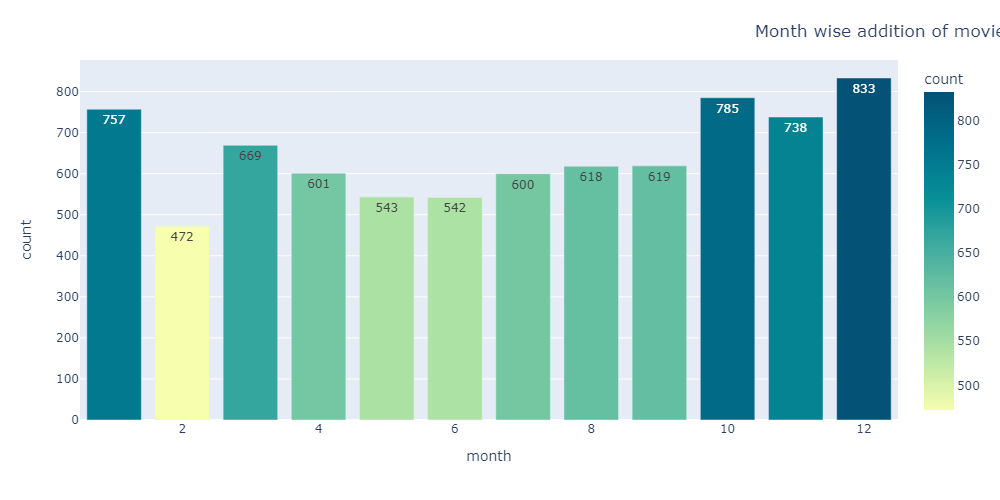

In [25]:
fig = px.bar(months_df, x="month", y="count", text_auto=True, color='count',color_continuous_scale='bluyl')
fig.update_layout(
    title={
        'text': 'Month wise addition of movies and shows to the platform',
        'y':0.95,
        'x':1,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1000,
        height=500)
# fig.show()
fig.show('png')
     


#### 1. Most of the content is get added by the year end and at the beginning 
#### 2. This may be due to fact that this is winter and holiday season and people love to watch movies and shows by staying at home 

### Content over the year 

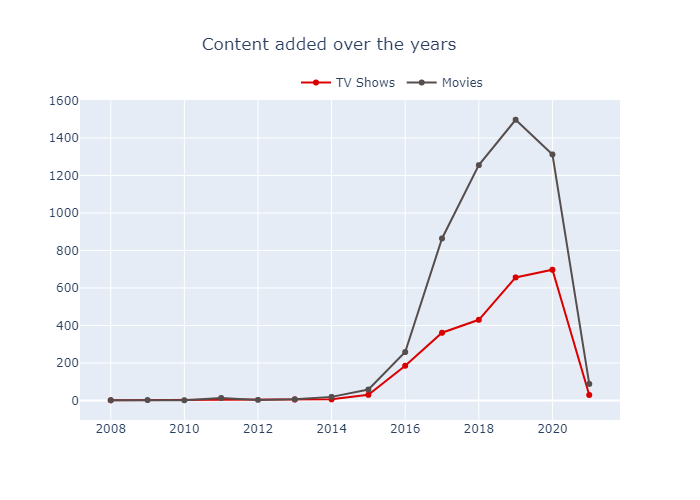

In [26]:
# Creating new year column in dummy dataset to see progess over the year. 
a1['year_added'] = a1['date_added'].dt.year

tv_show = a1[a1['type']=='TV Show']
movie = a1[a1['type']=='Movie']

col = "year_added"

content_1 = tv_show[col].value_counts().reset_index()
content_1 = content_1.rename(columns = {col : "count", "index" : col})
content_1 = content_1.sort_values(col)

content_2 = movie[col].value_counts().reset_index()
content_2 = content_2.rename(columns = {col : "count", "index" : col})
content_2 = content_2.sort_values(col)

trace1 = go.Scatter(x=content_1[col], y=content_1["count"], name="TV Shows", marker=dict(color="#db0000"))
trace2 = go.Scatter(x=content_2[col], y=content_2["count"], name="Movies", marker=dict(color="#564d4d"))

data = [trace1, trace2]
layout = go.Layout(title="Content added over the years",title_x=0.47, legend=dict(x=0.4, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)


fig.show('png')
# fig.show()

In [27]:
# lets see why it declined in year 2021 
len(a1[a1['year_added']==2021])

117

#### 1. The content grows over the year and it peaked out in year 2020 
#### 2. The movies growth over the year is more than tvShows 
#### 3. The reason it declined in year 2021 that we dont have much data available 

### Content by Countries

In [28]:
#Importing dataset conataining countries and their codes 
country_code = pd.read_csv('E:\\# DATA SCIENCE\\all.csv', usecols = ['name', 'alpha-3'])

In [29]:
counts = country_code.value_counts()
Yemen = counts['Brazil']
print(Yemen)

alpha-3
BRA    1
dtype: int64


In [30]:
from collections import Counter 
# this is specialized container data type library 
#Counter: A subclass of dict that counts the number of occurrences of each element in a sequence.
countries = ", ".join(a1['country'].dropna()).split(", ")
countries_dict = dict(Counter(countries))
countries_dict = dict((key, value) for key, value in countries_dict.items())

In [31]:
countries_dict

{'Brazil': 88,
 'Mexico': 154,
 'Singapore': 39,
 'United States': 3296,
 'Turkey': 108,
 'Egypt': 110,
 'India': 990,
 'Poland': 35,
 'Thailand': 65,
 'Nigeria': 76,
 'unknown': 507,
 'Norway': 29,
 'Iceland': 9,
 'United Kingdom': 722,
 'Japan': 287,
 'South Korea': 212,
 'Italy': 90,
 'Canada': 412,
 'Indonesia': 80,
 'Romania': 12,
 'Spain': 215,
 'South Africa': 54,
 'France': 349,
 'Portugal': 4,
 'Hong Kong': 102,
 'China': 147,
 'Germany': 199,
 'Argentina': 82,
 'Serbia': 7,
 'Denmark': 44,
 'Kenya': 5,
 'New Zealand': 28,
 'Pakistan': 24,
 'Australia': 144,
 'Taiwan': 85,
 'Netherlands': 45,
 'Philippines': 78,
 'United Arab Emirates': 34,
 'Iran': 4,
 'Belgium': 85,
 'Israel': 26,
 'Uruguay': 14,
 'Bulgaria': 9,
 'Chile': 26,
 'Russia': 27,
 'Mauritius': 1,
 'Lebanon': 26,
 'Colombia': 45,
 'Algeria': 2,
 'Soviet Union': 3,
 'Sweden': 39,
 'Malaysia': 26,
 'Ireland': 40,
 'Luxembourg': 11,
 'Finland': 11,
 'Austria': 11,
 'Peru': 10,
 'Senegal': 3,
 'Switzerland': 17,
 'Ghan

In [32]:
# Map the country code dataset with countries dict.
country_code['Count'] = country_code['name'].map(countries_dict)

In [33]:
country_code.head()

,name,alpha-3,Count
0,Afghanistan,AFG,1.0
1,Åland Islands,ALA,NaN
2,Albania,ALB,1.0
3,Algeria,DZA,2.0
4,American Samoa,ASM,NaN


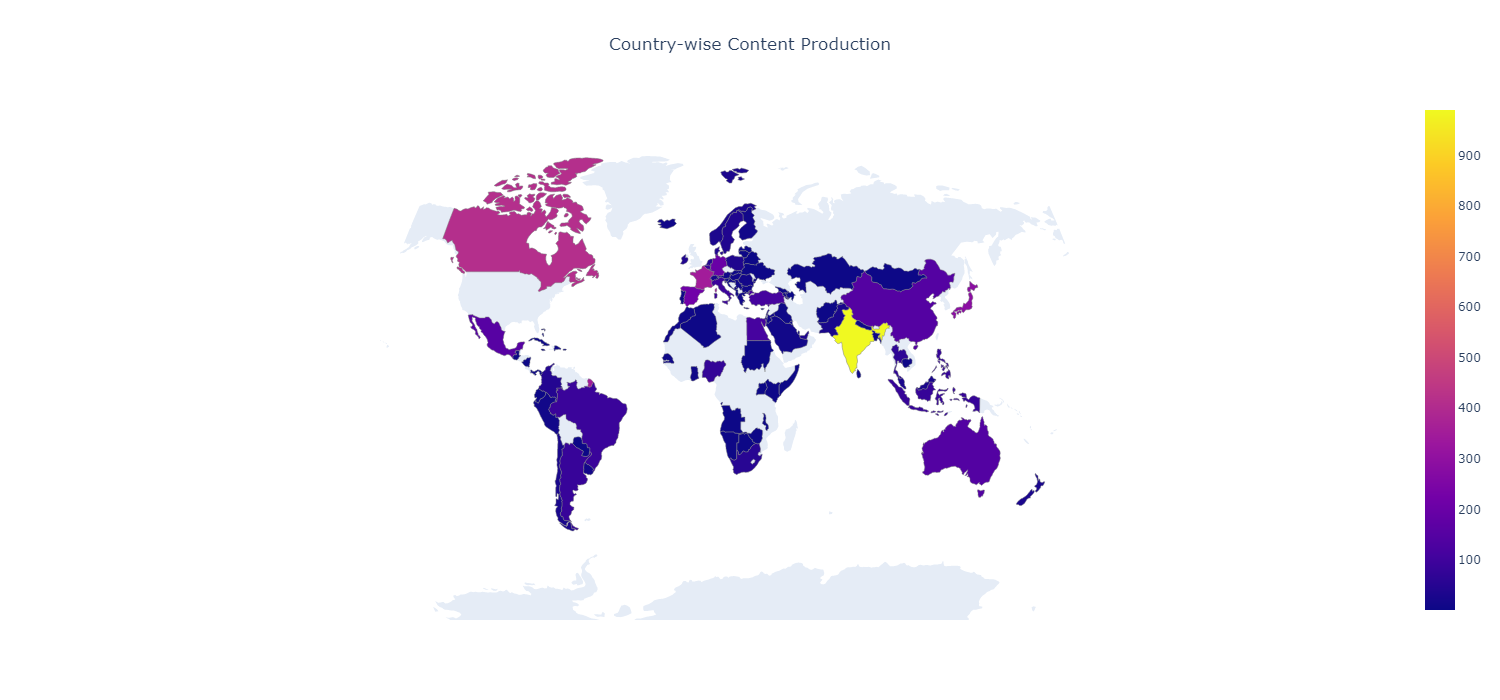

In [34]:
# Create Geo plot to see which country produces more content.

# Define data
data = dict(type='choropleth', 
            locations = country_code['alpha-3'], 
            z = country_code['Count'], 
            text = country_code['name'],
            marker = dict(line = dict (color = 'grey',width = 0.5)),
            # colorbar = dict(autotick = True, title = '')
            )

# Define layout.
layout = dict(title = 'Country-wise Content Production', title_x=0.5,height=700, width=1500,
              geo = dict( projection = {'type':'times'},
                         showlakes = False,
                         showcoastlines = False,
                         showframe = False, 
                         showocean = False,
                         showland = True,
                         fitbounds = 'locations',
                         ))

# Plot it.
country_plot = go.Figure(data = [data], 
              layout = layout
              )
# iplot(country_plot)
country_plot.show('png')

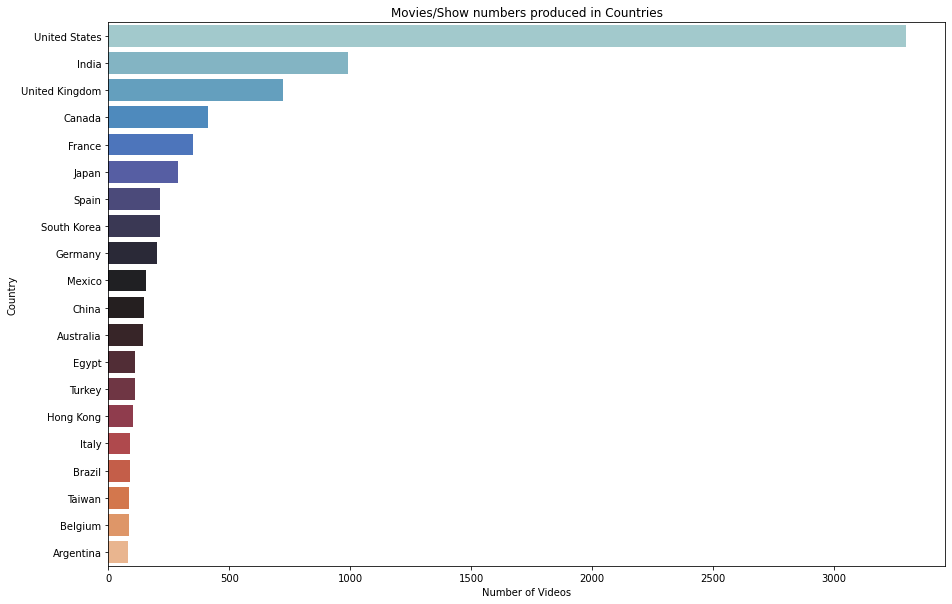

In [35]:
a = df_copy[df_copy.country != 'unknown'].loc[:,['show_id','title','country', 'listed_in']].copy()
countrylist = (a['country'].to_list())

newlist = []
for country in countrylist:
  if ',' in country:
    a = country.split(', ')
    newlist = newlist + a
  else:
    newlist.append(country)

country_list = pd.DataFrame({'country' : newlist, 'id':np.arange(0,len(newlist),1)})
a = country_list.groupby('country').agg({'id':'count'}).sort_values('id', ascending= False).head(20).reset_index()
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'country', x = 'id',data = a , palette='icefire')
a = plt.title('Movies/Show numbers produced in Countries')
a = plt.ylabel('Country')
a = plt.xlabel('Number of Videos')
top10countries = country_list.groupby('country').agg({'id':'count'}).sort_values('id', ascending= False).head(10).reset_index()['country'].unique()

#### 1. The most content is produced in United States and then India 

### Top Genres on Netflix 

<AxesSubplot: xlabel='count', ylabel='Genres'>

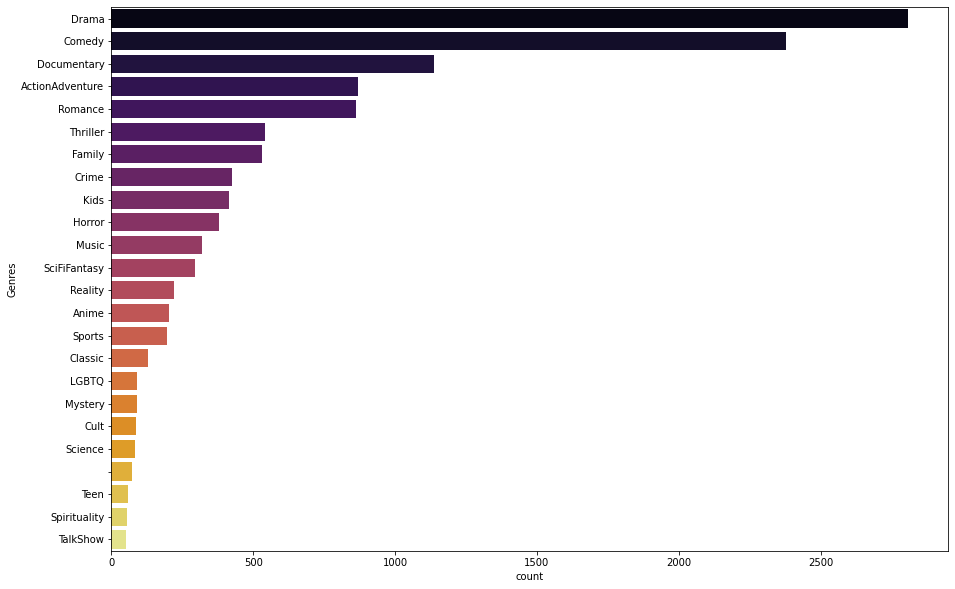

In [36]:
a = df_copy.loc[:,['show_id','title','country','Genres']].copy()
a = a.explode("Genres")
genre_list = a.Genres.unique()
group = a.groupby('Genres').agg(count= ('show_id','count')).sort_values('count',ascending = False).reset_index()

# Ploting graph 
plt.figure(figsize=(15,10))
sns.barplot(y='Genres', x = 'count', data = group, palette = 'inferno')

#### The top genres in Netflix are Drama, Comedy, Documetry 

### Directors on Netflix

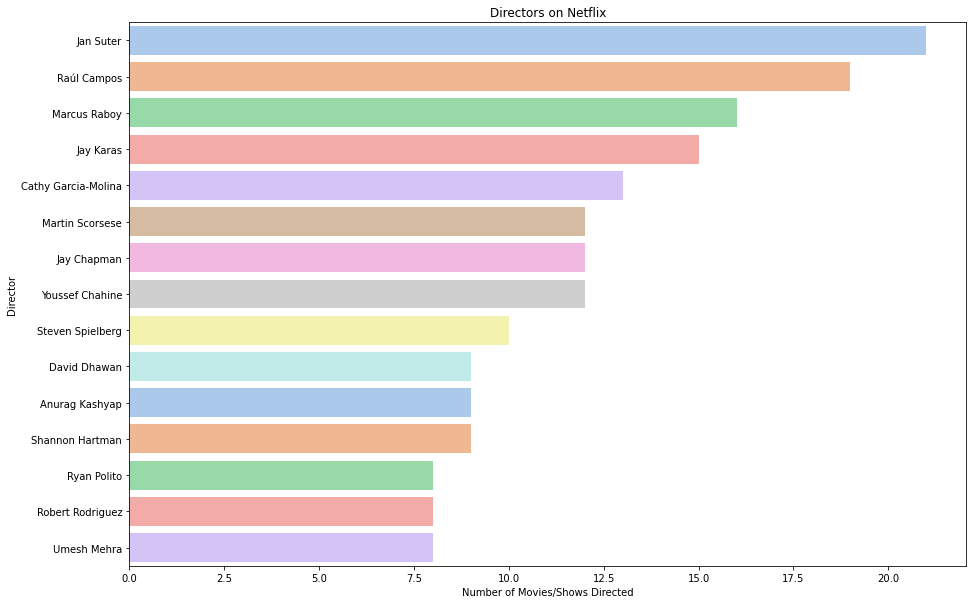

In [37]:
a = df_copy[df_copy.director != 'unknown'].loc[:,['show_id','title', 'director']].copy()
director = (a['director'].to_list())

newlist = []
for genre in director:
  if ',' in genre:
    a = genre.split(', ')
    newlist = newlist + a
  else:
    newlist.append(genre)
    
director_list = pd.DataFrame({'Director' : newlist, 'id':np.arange(0,len(newlist),1)})
a = director_list.groupby('Director').agg({'id':'count'}).sort_values('id', ascending= False).reset_index().head(15)
plt.figure(figsize=(15,10))

# we are using simple barplot to show top directors based on their counts in given data set 
a = sns.barplot(y = 'Director', x = 'id',data = a , palette= 'pastel')
a = plt.title('Directors on Netflix')
a = plt.ylabel('Director')
a = plt.xlabel('Number of Movies/Shows Directed')
top10directors = director_list.groupby('Director').agg({'id':'count'}).sort_values('id', ascending= False).reset_index().head(10)['Director'].to_list()


#### Observation 
#### The top directors on Netflix are 1.Jan Suter 2. Raul Campos 3.Marcus Raboy

### CAST 
#### which is favourite cast of Netflix content ? 

In [38]:
#Creating new dataframe for list of all acotrs 
a = df_copy[df_copy.cast != 'unknown'].loc[:,['show_id', 'title','cast']].copy()
cast = (a['cast'].to_list())

newlist = []
for i in cast: 
    if ',' in i:
        a = i.split(', ')
        newlist = newlist + a 
    else:
        newlist.append(i)
        
actorlist = pd.DataFrame({'actor' :newlist, 'id': np.arange(0,len(newlist),1)})
b = actorlist.groupby('actor').agg({'id':'count'}).sort_values('id', ascending =False).head(10).reset_index()


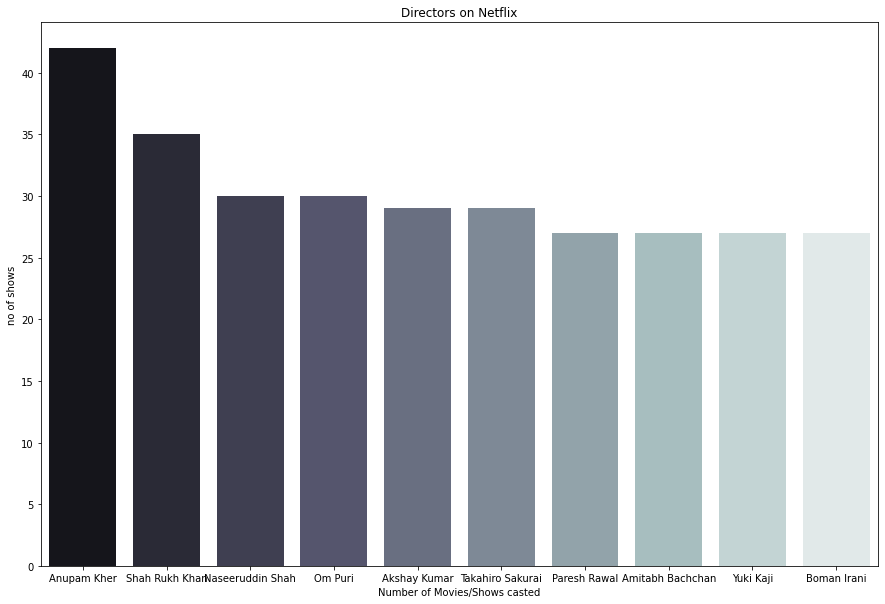

In [39]:
# Plot it.
plt.figure(figsize=(15,10))
a = sns.barplot(x = 'actor', y = 'id',data = b , palette= 'bone')
a = plt.title('Directors on Netflix')
a = plt.ylabel('no of shows')
a = plt.xlabel('Number of Movies/Shows casted')
top10actors = actorlist.groupby('actor').agg({'id':'count'}).sort_values('id', ascending= False).head(5).reset_index()['actor'].to_list()

#### The top 3 actors or cast in tv shows or in moviea are 1.Anupam Kher 2. Shah Rukh Khan 3. Nasserudin Shah 

### Duration of movies and tv shows on NEtflix 

####  Duaration of movies

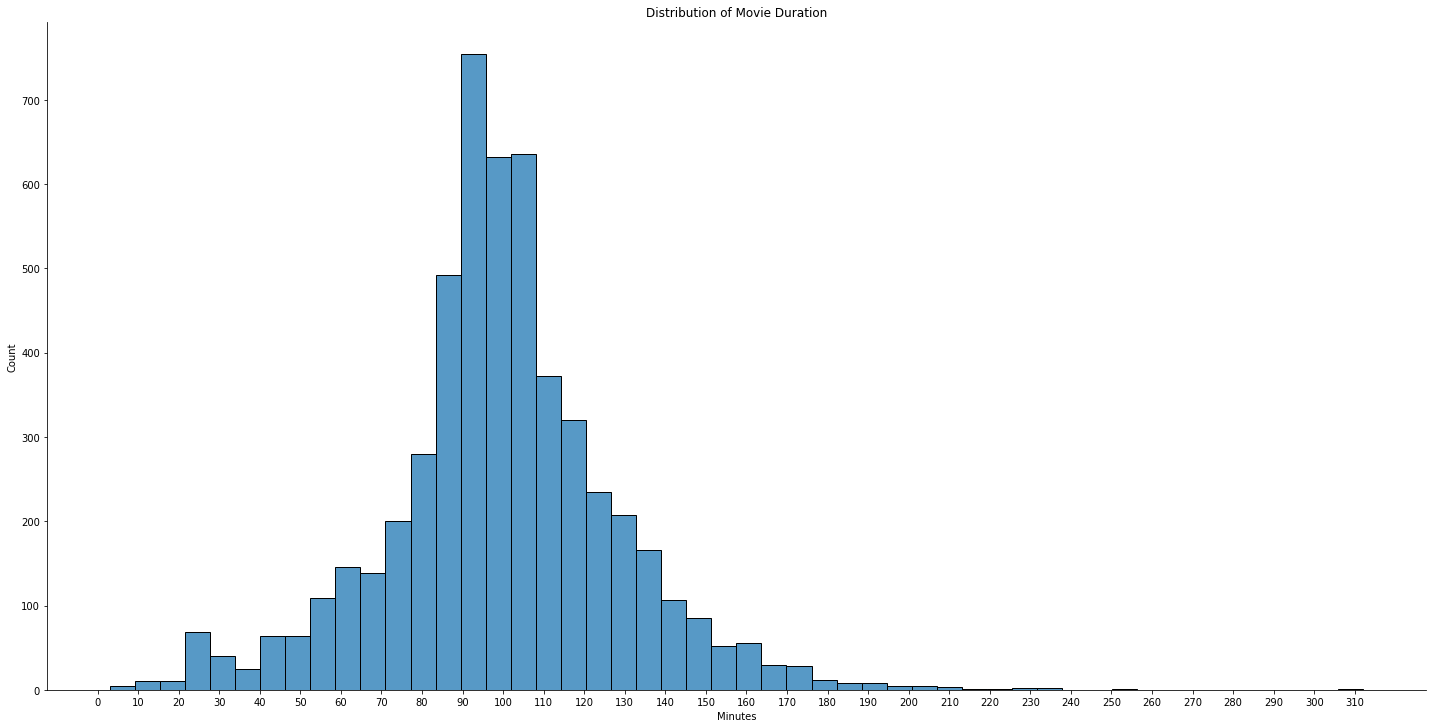

In [40]:
a=df_copy[df_copy['type']=='Movie'].loc[:,['show_id','duration']].copy()
cast = (a['duration'].to_list())

newlist = []
for genre in cast:
  newlist.append(int(genre.split(' ')[0]))
country_list = pd.DataFrame({'Duration' : newlist, 'id':np.arange(0,len(newlist),1)})
a = sns.displot(x= 'Duration',  data = country_list, kind = 'hist', height=10, aspect=2, bins = 50)
a = plt.title('Distribution of Movie Duration')
a = plt.xlabel('Minutes')
a = plt.xticks(ticks = np.arange(0,country_list.Duration.max()+1,10))

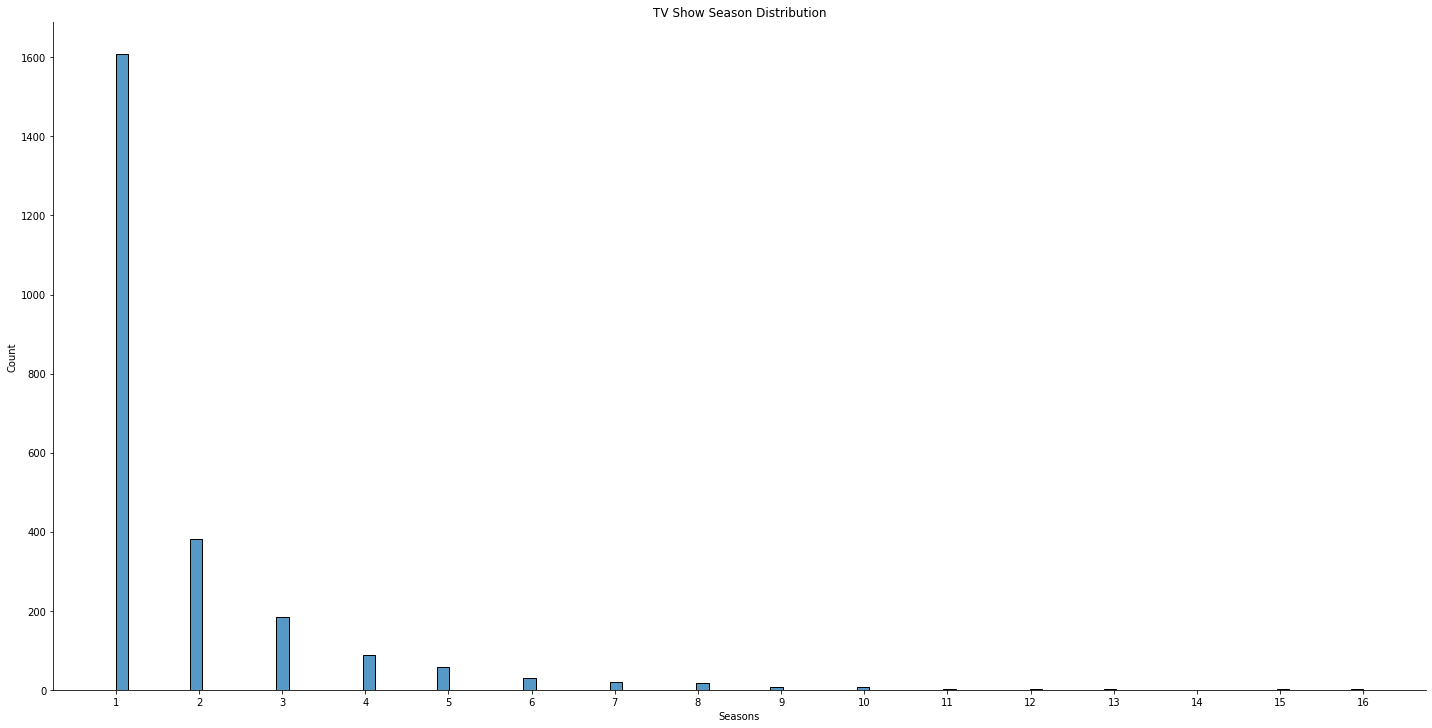

In [41]:
a=df_copy[df_copy['type']!='Movie'].loc[:,['show_id','duration']].copy()
cast = (a['duration'].to_list())

newlist = []
for genre in cast:
  newlist.append(int(genre.split(' ')[0]))
country_list = pd.DataFrame({'Seasons' : newlist, 'id':np.arange(0,len(newlist),1)})
a = sns.displot(x= 'Seasons',  data = country_list, kind = 'hist', height=10, aspect=2)
a = plt.title('TV Show Season Distribution')
a = plt.xlabel('Seasons')
a = plt.xticks(ticks = np.arange(country_list.Seasons.min(),country_list.Seasons.max()+1,1))

### Observation 
#### 1. Most movies are in duration of range of 90 to 110 min 
#### 2. Most of the Tv shows only have 1 seaon on Netflix  

###  UNDERSTANDING CONTENT PRODUCED IN DIFFERENT COUNTRIES


In [42]:
# creating dataframe with list of countries and title attribute with genre
a = df_copy[df_copy['country'] != 'unknown country'].loc[:,['show_id','title','country','listed_in','Genres']].copy()

In [43]:
#function to convert string type to list 
def operation(row,string):
  return row[string].split(', ')
a['listed_in'] = a.apply(lambda x: operation(x,'listed_in'), axis = 1)
a['country'] = a.apply(lambda x: operation(x,'country'), axis = 1)

In [44]:
#explodes the list of categories and genres in each row to individual rows
a = a.explode('Genres').explode('country')

In [45]:
a = a.groupby(['country','Genres']).agg({'show_id':'count'}).reset_index() #table contains number of videos belonging to each genre from different count

In [46]:
#function to return the indeces that contain the top10 countries with the top 10 genres viewed
def selectindex(row, attribute, list):
  b = row[attribute]
  boolean = b in list
  return boolean

index = a.apply(lambda x: selectindex(x, 'country',top10countries), axis = 1)

#Above in top genre plot we created plot of diiferent genre with their value count 
# from there we are creating one more variable for top 15 genre to compare 
top15genres = group.head(15)['Genres'].to_list()
newindex = a[index].apply(lambda x: selectindex(x, 'Genres',top15genres), axis = 1)

In [47]:
newdata = a[index][newindex] #data that contains the number videos in the top 15 genres in the top 10 countries

In [48]:
gyr = ['#ff00ff','#00bfff',
 '#7f0000','#483d8b','#f0e68c','#b03060','#ff7f50','#00ff00',
 '#ee82ee','#00ffff','#1e90ff','#9acd32','#00fa9a','#ffb6c1',
 '#8b008b','#b8860b','#00008b','#ffd700','#008000','#008b8b','#e0ffff',
 '#000000','#ff0000','#0000ff','#556b2f']

Text(0, 0.5, 'NUMBER OF SHOWS & MOVIES')

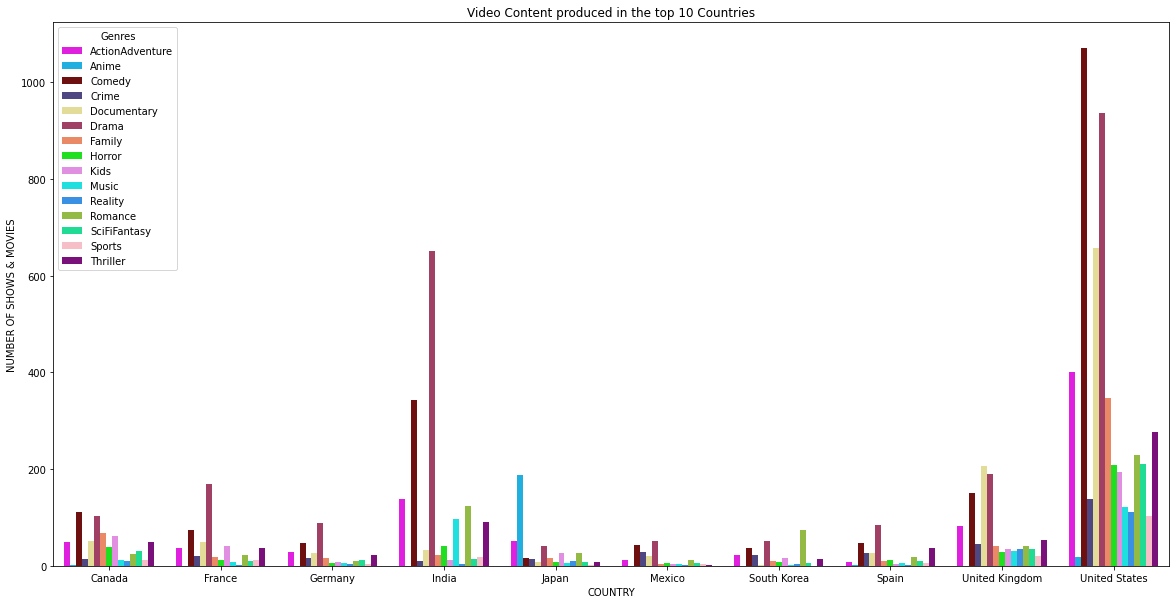

In [49]:
a = plt.figure(figsize=(20,10))
sns.barplot(x = newdata['country'], y = newdata['show_id'], hue = newdata['Genres'], palette= sns.color_palette(gyr[:23]) )
plt.title('Video Content produced in the top 10 Countries')
plt.xlabel('COUNTRY')
plt.ylabel('NUMBER OF SHOWS & MOVIES')

#### Observation 
1. The most content is produced by United States, this makes sense since Netflix is US company 
2. India is second country in ranking of production, this explain effect of bollywood on viewers around the world 
3. Each country's most produced content by Genre is comedy content except United kingdom
4. After comedy people preffer thriller content.
5. In countries like Japan the most produced content is Anime, people over there love Anime Content.

### RATINGS 

Netflix added content ratings so that their viewers can make informed for themselves and their children. Netflix determines maturity ratings by the frequency and impact of mature content in a TV show or movie. TV show rating reflect the overall maturity level of the whole series. 

For 
1. Little kids - G, TV-Y, TV-G
2. Other Kids - PG, TV-Y7, TV-Y7-FV, TV-PG
3. Teens - PG-13,TV-14
4. Mature - R, NC17, TV-MA

In [50]:
#creating seprate dictionary to content content type with their count 
movies = df_copy[df_copy['type']=='Movie']
tv_show = df_copy[df_copy['type']=='TV Show']
movies_rating = dict(movies['rating'].value_counts())
tv_shows_rating = dict(tv_show['rating'].value_counts())

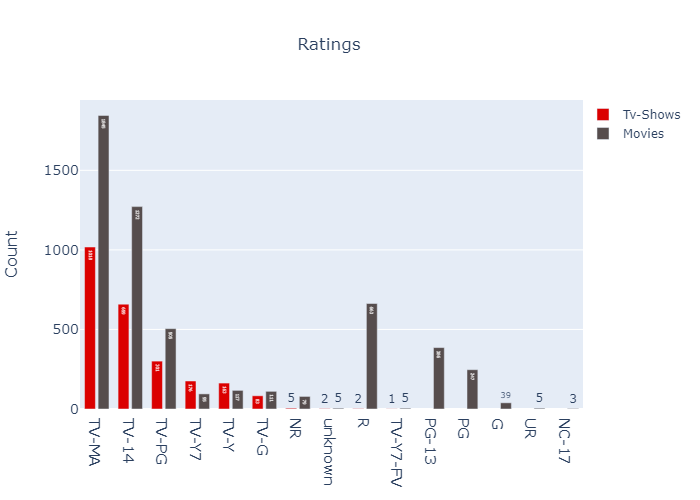

In [51]:
# Plot the count of ratings for Tv shows and movies to understand them better.
fig = go.Figure()
fig.add_trace(go.Bar(x=list(tv_shows_rating.keys()),
                y=list(tv_shows_rating.values()),
                text=list(tv_shows_rating.values()),
                name='Tv-Shows',
                marker_color='rgb(219,0,0)'
                ))
fig.add_trace(go.Bar(x=list(movies_rating.keys()),
                y=list(movies_rating.values()),
                text=list(movies_rating.values()),
                name='Movies',
                marker_color='rgb(86,77,77)'
                ))

fig.update_layout(
    title='Ratings',title_x=0.47,
    xaxis_tickfont_size=15,
    yaxis=dict(
        title='Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.19,
    bargroupgap=0.2 
)
# fig.show()
fig.show('png')
# we used barplot which generally solves our purpose to show ratings with their value count in simplest way.

### Observation 
1. THe Highest content of TV-show available in TV-MA rating which is Mature audience only. This indicate mature content is more popular on the Netflix. 
2. The Second and Third highest rated content are TV-14 and Tv-PG content.

## Words 

#### We will see which are the words that comes the most in title, Description and Genre
This will tells us which are the most viewed, searched words in Netflix Directory in given duration so we can make analysis around this words 

### Title 

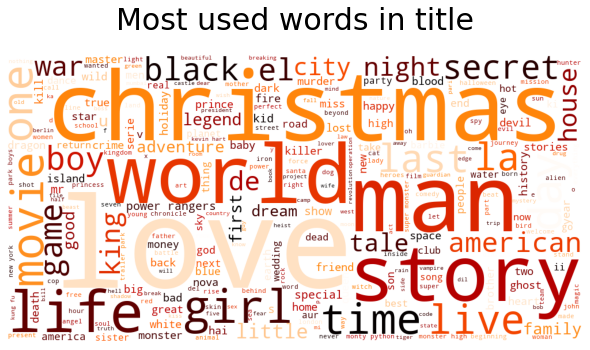

In [52]:
# Importing libraires 
from wordcloud import WordCloud, STOPWORDS
# create string to store all the words 
comment_words = ''

# remove the stopwords
stopwords = set(STOPWORDS)

#iterate through the column
for val in df_copy.title:
    
    #typecast each val to string
    val = str(val)
    
    #split the value 
    tokens = val.split()
    
    # converts each token into lowercase 
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 1000, height = 500,
                     background_color = 'white', 
                     stopwords = stopwords, 
                     min_font_size = 10,
                     max_words = 1000,
                     colormap = 'gist_heat_r').generate(comment_words)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.title('Most used words in title', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Observation 
The most observed words are Christmas, Man, Lobe, World, MOvie, Girl

#### Description 

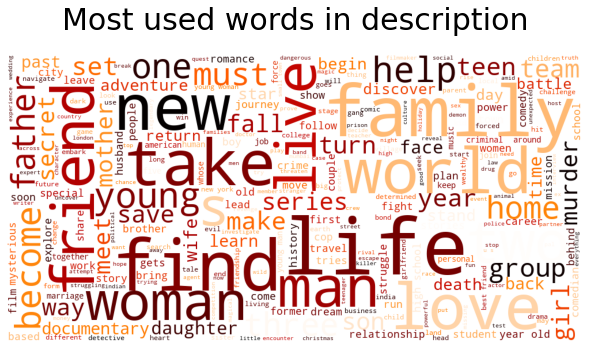

In [53]:
# Importing libraires 
from wordcloud import WordCloud, STOPWORDS
# create string to store all the words 
comment_words = ''

# remove the stopwords
stopwords = set(STOPWORDS)

#iterate through the column
for val in df_copy.description:
    
    #typecast each val to string
    val = str(val)
    
    #split the value 
    tokens = val.split()
    
    # converts each token into lowercase 
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 1000, height = 500,
                     background_color = 'white', 
                     stopwords = stopwords, 
                     min_font_size = 10,
                     max_words = 1000,
                     colormap = 'gist_heat_r').generate(comment_words)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.title('Most used words in description', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Observation 
1. The most used words in Description are Life, Family, Love, Friend
2. This makes sense as most of the content is around this topics only 

### Genres 

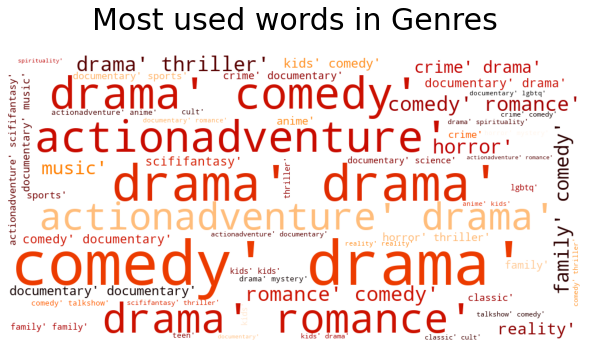

In [54]:
# Importing libraires 
from wordcloud import WordCloud, STOPWORDS
# create string to store all the words 
comment_words = ''

# remove the stopwords
stopwords = set(STOPWORDS)

#iterate through the column
for val in df_copy.Genres:
    
    #typecast each val to string
    val = str(val)
    
    #split the value 
    tokens = val.split()
    
    # converts each token into lowercase 
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 1000, height = 500,
                     background_color = 'white', 
                     stopwords = stopwords, 
                     min_font_size = 10,
                     max_words = 1000,
                     colormap = 'gist_heat_r').generate(comment_words)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.title('Most used words in Genres', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#### Observation 
1. We already saw in content genre count that most content is Comedy


### Hypothesis Testing 

#### Hypothesis testing to check is there any relation between year added and type 

#### 1. Null Hypothesis - year_added has no impact on type of content that gets added to the platform 
#### 2. Alternate Hypothesis - year_added has imapct on type of content that gets added to the platform 

##### Significance level - 5% (0.05)

In [55]:
# creating year added column in dummy data frame 
df_copy['year_added'] = df_copy['date_added'].dt.year

# using crosstab fucntion to generate a cross-tabulation of two or more variable.
hypo_data = pd.crosstab(df_copy['type'], df_copy['year_added'], margins = False)
hypo_data 

year_added,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
type,,,,,,,,,,,,,,
Movie,1,2,1,13,3,6,19,58,258,864,1255,1497,1312,88
TV Show,1,0,0,0,0,5,6,30,185,361,430,656,697,29


In [56]:
from scipy.stats import chisquare 
from scipy.stats import chi2_contingency 
stat, p, dof, expected = chi2_contingency(hypo_data)
p

8.635372719955465e-11

#### The p value is smaller than significance level, we will reject the null hypothesis and accept the alternative hypothesis

In [57]:
# Now lets check what type of content got added in the past few years 
# we will only check only genre category of the data from year 2018 

df_copy['year_added'] = df_copy['date_added'].dt.year

recent_year = pd.DataFrame(df_copy.groupby(['year_added','listed_in'])['listed_in'].count())
recent_year.rename(columns ={'listed_in':'Count'}, inplace=True)
recent_year = recent_year.reset_index()
recent_year.drop(recent_year[recent_year.year_added < 2018].index, inplace = True)

#creating function to split each genre and get their respective counts 

def seperate_all_genre(year):
    year_added = recent_year[recent_year['year_added']==year]
    year_added = ", ".join(year_added['listed_in'].dropna()).split(", ")
    year_added_dict = dict(Counter(year_added))
    return year_added_dict
# create list of years 
yr_list = [2018,2019,2020,2021]
# interate through all values in yr_list 
yr_genre_count_list = {}
for i in yr_list:
    data = seperate_all_genre(i)
    yr_genre_count_list[i] =data
    yr_genre_count_df = pd.DataFrame(yr_genre_count_list).reset_index()
    yr_genre_count_df.rename({'index':'Genre'}, inplace = True, axis =1)

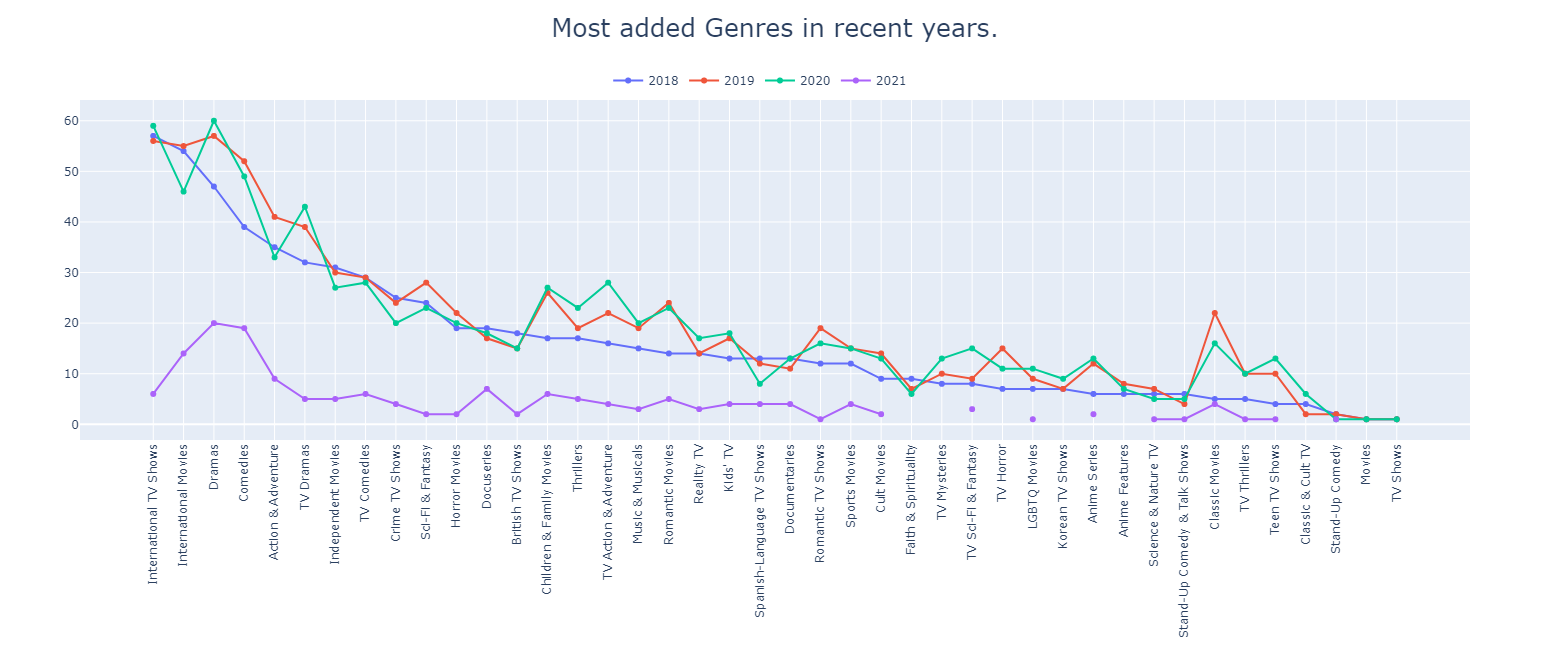

In [58]:
# Plot the above data.
df = yr_genre_count_df.sort_values([2018,2019,2020,2021],ascending=False)
fig = go.Figure()
fig.add_trace(go.Scatter(y=df[2018], x=df['Genre'],
                    mode='lines+markers',
                    name=2018))
fig.add_trace(go.Scatter(y=df[2019], x=df['Genre'],
                    mode='lines+markers',
                    name=2019))
fig.add_trace(go.Scatter(y=df[2020], x=df['Genre'],
                    mode='lines+markers', 
                    name=2020))
fig.add_trace(go.Scatter(y=df[2021], x=df['Genre'],
                    mode='lines+markers', 
                    name=2021))
fig.update_xaxes(tickangle=-90)
fig.update_layout(title={'text': 'Most added Genres in recent years.',
                          'y':0.97,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'},height=650, width=1550,legend=dict(x=0.38, y=1.1, orientation="h"))

# fig.show()
fig.show('png')

#### 1. From earlier observation we already know Netflix has been adding Comedy and Drama Genres in major quatity
#### 2. This trend continuos in yaer 2020 and 2021 also 
#### 3. In year 2019, 2020 there is clear spike in addition of genre like Children movies, TV action , Romantic Movies and in classic movies 

### Data Preprocessing 
#### We Will be using text columns to create clusters for our data. 

In [59]:
cluster_df = df_copy[['title']]
cluster_df['cluster_data'] = (df_copy['description'] + ' ' + df_copy['listed_in'] + ' ' + df_copy['director'] + ' ' + df_copy['cast'] + ' ' + df_copy['country'] + ' ' + df_copy['rating']).astype(str)
cluster_df.set_index('title', inplace = True)
cluster_df.head()
cluster_df.head()

,cluster_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...
23:59,"When an army recruit is found dead, his fellow..."
9,"In a postapocalyptic world, rag-doll robots hi..."
21,A brilliant group of students become card-coun...


In [60]:
# Remove punctuation from the text.
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string 
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
    
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punctuation)
cluster_df.head(2)

,cluster_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...


In [61]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
stop_words = set(stopwords.words('english'))

In [63]:
# Remove the stopwords.
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stopwords)
cluster_df.cluster_data.head(2)

title
3%      future elite inhabit island paradise far crowd...
7:19    devastating earthquake hits mexico city trappe...
Name: cluster_data, dtype: object

In [64]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [65]:
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stemming)
cluster_df.head(2)
     

,cluster_data
title,
3%,futur elit inhabit island paradis far crowd sl...
7:19,devast earthquak hit mexico citi trap survivor...


In [66]:
bag_of_words = cluster_df.cluster_data

### Create Clusters = 

In [67]:
t_vectorizer = TfidfVectorizer(max_features = 20000)
x = t_vectorizer.fit_transform(bag_of_words)

In [68]:
print(x.shape)

(7787, 20000)


In [69]:
t_vectorizer.get_feature_names_out()

array(['007', '10', '100', ..., 'şahin', 'şinasi', 'ştar'], dtype=object)

### Dimensionality Reduction

In [70]:
pca = PCA()
pca.fit(x.toarray())

PCA()

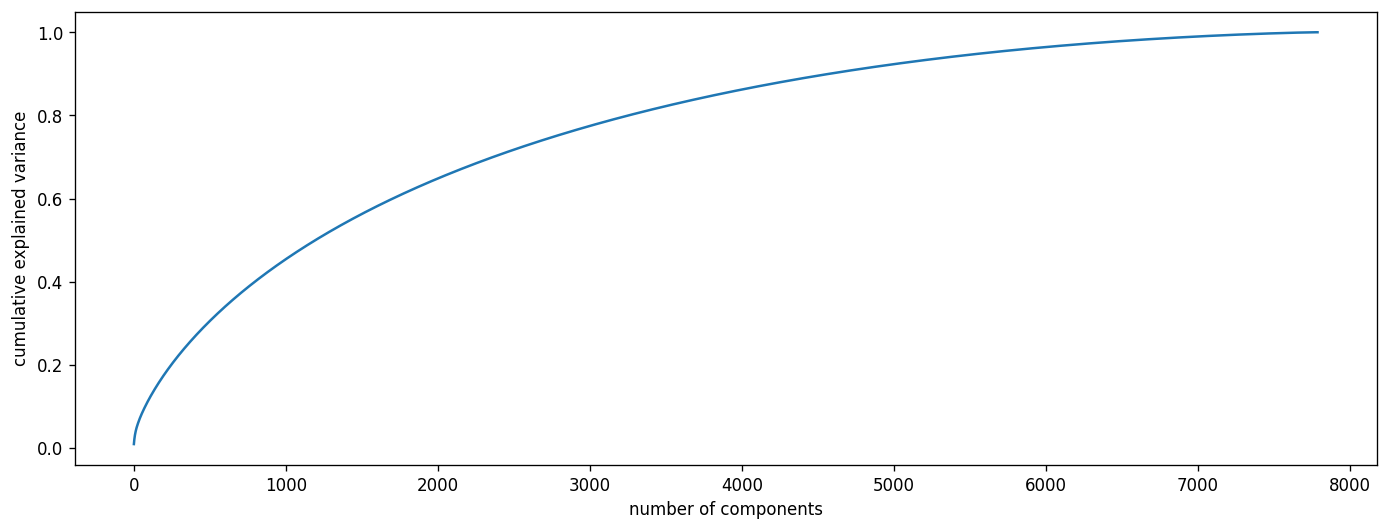

In [71]:
#let plat explained var v/s comp to check how many components to be coniser
plt.figure(figsize = (14,5), dpi = 120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### 95% variance can be explained by 5000 components 
#### since choosing 5000 could be tricky we will set the value to be 95% in sklearn

In [73]:
pca_tuned = PCA(n_components = 0.95)
pca_tuned.fit(x.toarray())
x_transformed = pca_tuned.transform(x.toarray())
x_transformed.shape

(7787, 5600)

In [74]:
x_transformed 

array([[ 1.23768620e-01, -2.74174371e-02, -2.25092132e-02, ...,
        -9.65927777e-03, -2.03116187e-03,  1.14971874e-03],
       [-4.64730524e-02, -3.82507999e-02,  3.46039739e-03, ...,
         2.58249399e-05, -4.02994330e-03,  4.37310772e-03],
       [-5.26864060e-02, -4.78816100e-02, -3.14268058e-02, ...,
         3.78689259e-03, -1.68886610e-03, -6.33608374e-03],
       ...,
       [-3.21476562e-02,  1.02314254e-01,  2.69380654e-01, ...,
        -8.32399072e-03,  7.73975111e-03,  2.26837136e-03],
       [ 1.07149974e-01,  4.95985737e-03,  1.63970754e-02, ...,
        -9.19596895e-03,  5.05795621e-03,  6.06624728e-03],
       [-6.06050976e-02,  2.57428677e-01,  2.97734419e-01, ...,
         1.25282231e-02, -5.26076763e-03, -1.55721891e-04]])

### Get optimum K value using Metric : shilhoutte

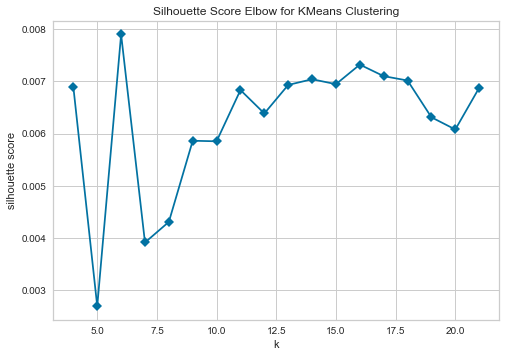

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [79]:
from sklearn.cluster import KMeans 
from yellowbrick.cluster import KElbowVisualizer 
model = KMeans(random_state = 5)
visualizer = KElbowVisualizer(model, k = (4,22), metric = 'silhouette', timings = False, locate_elbow = False)
visualizer.fit(x_transformed)
visualizer.show()

In [80]:
from yellowbrick.cluster import SilhouetteVisualizer

In [87]:
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(x_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(x_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(x_transformed) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

For n_clusters = 2, silhouette score is 0.005392940196697517


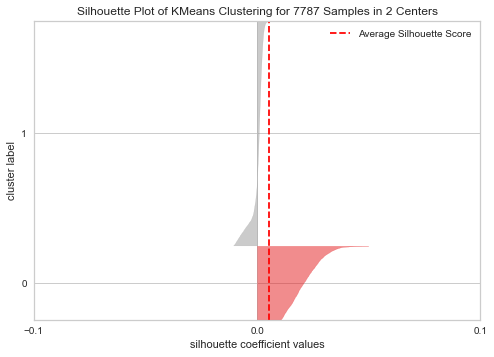

For n_clusters = 3, silhouette score is 0.006381441059252907


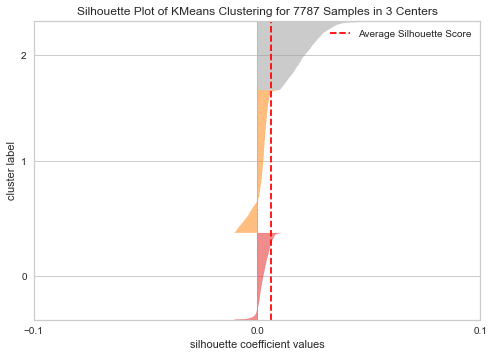

For n_clusters = 4, silhouette score is 0.00689175515601103


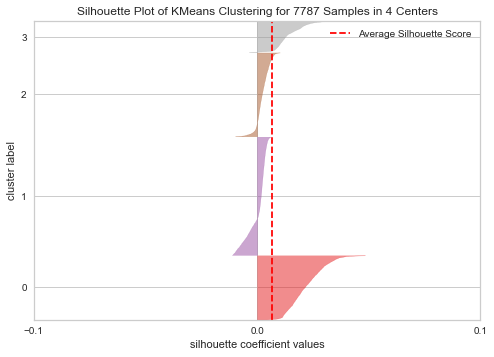

For n_clusters = 5, silhouette score is 0.0026892607210334003


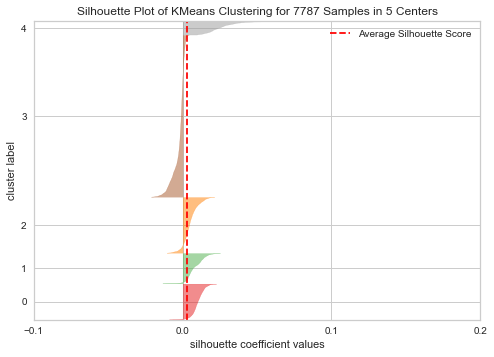

For n_clusters = 6, silhouette score is 0.007901672113026784


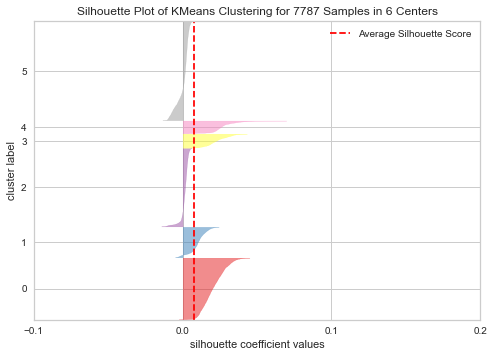

For n_clusters = 7, silhouette score is 0.00391108809051987


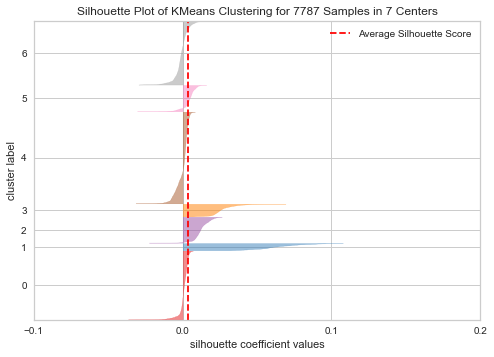

For n_clusters = 8, silhouette score is 0.004306079585240782


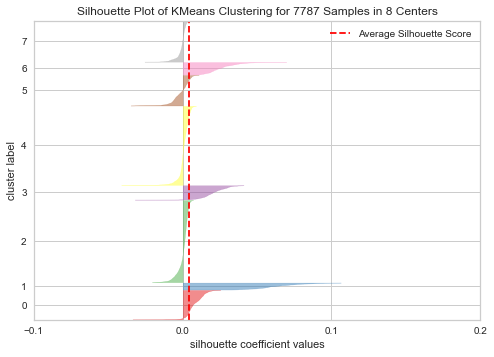

For n_clusters = 9, silhouette score is 0.005862368656900212


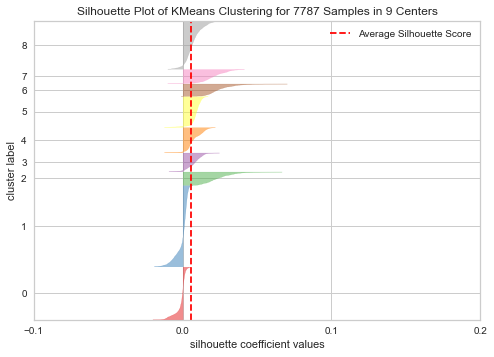

For n_clusters = 10, silhouette score is 0.005851804745196076


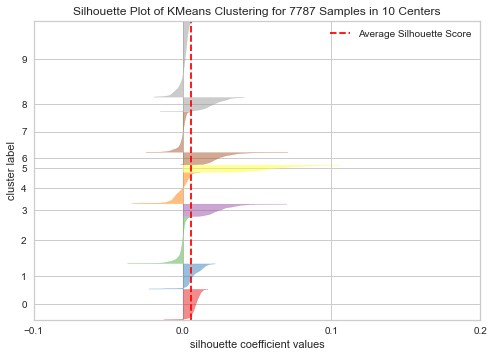

For n_clusters = 11, silhouette score is 0.0068345307506526


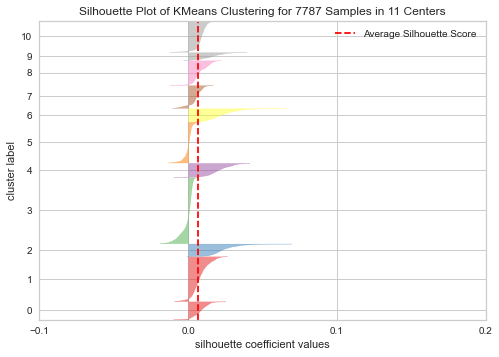

For n_clusters = 12, silhouette score is 0.006385919303041799


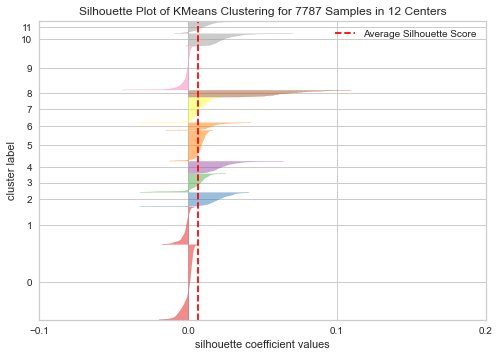

For n_clusters = 13, silhouette score is 0.00693259180608049


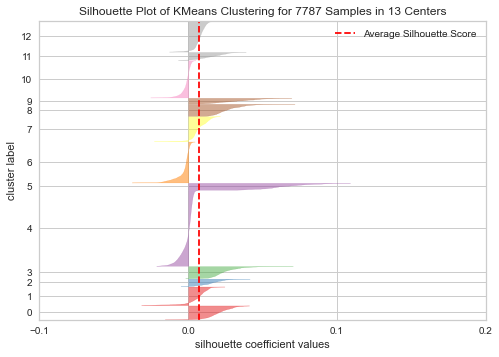

For n_clusters = 14, silhouette score is 0.0070421483036316335


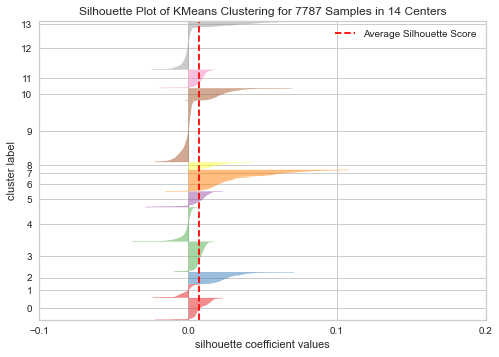

For n_clusters = 15, silhouette score is 0.006947391835054353


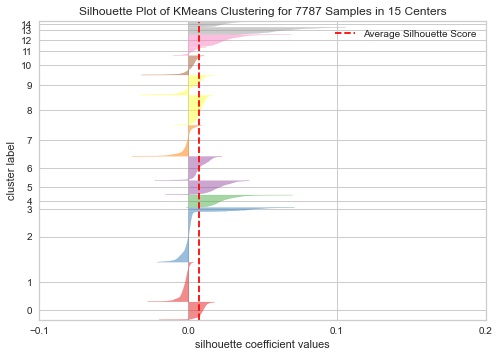

For n_clusters = 16, silhouette score is 0.007322471693486112


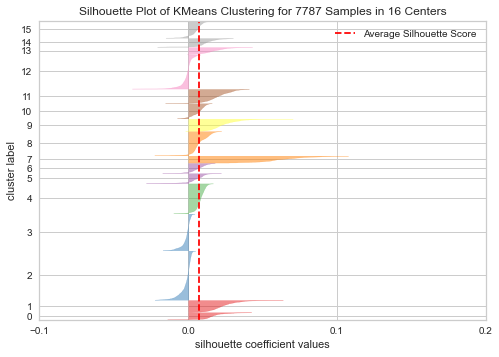

For n_clusters = 17, silhouette score is 0.0071012767383764105


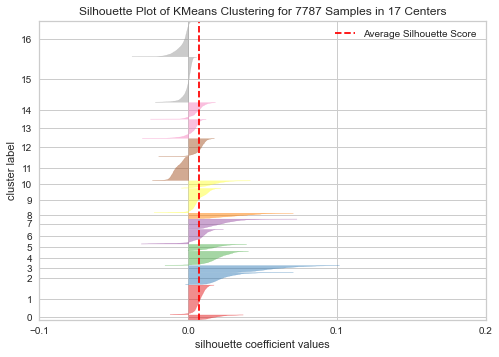

For n_clusters = 18, silhouette score is 0.007017450410386013


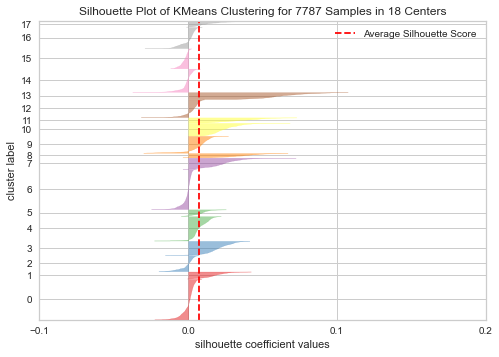

For n_clusters = 19, silhouette score is 0.006312114748174681


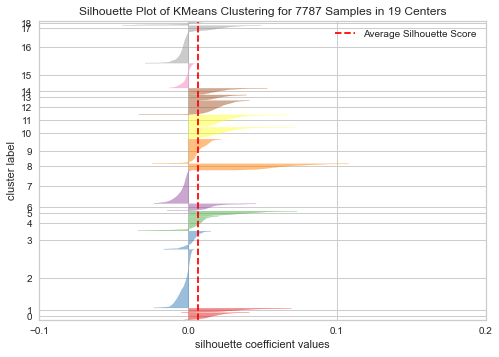

For n_clusters = 20, silhouette score is 0.0060784515007279785


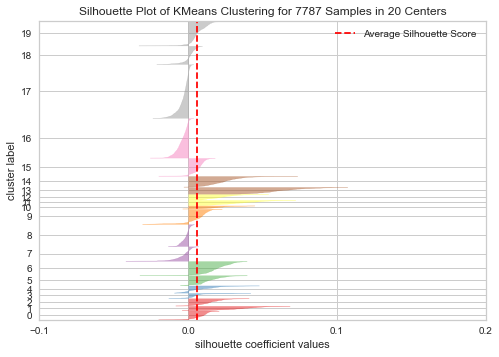

For n_clusters = 21, silhouette score is 0.006877826002743426


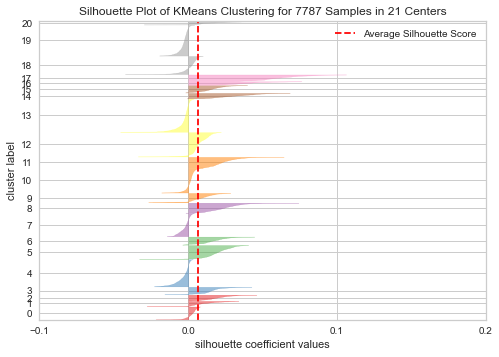

In [88]:
silhouette_score_analysis(22)

#### Elbow method to find optimum k value:

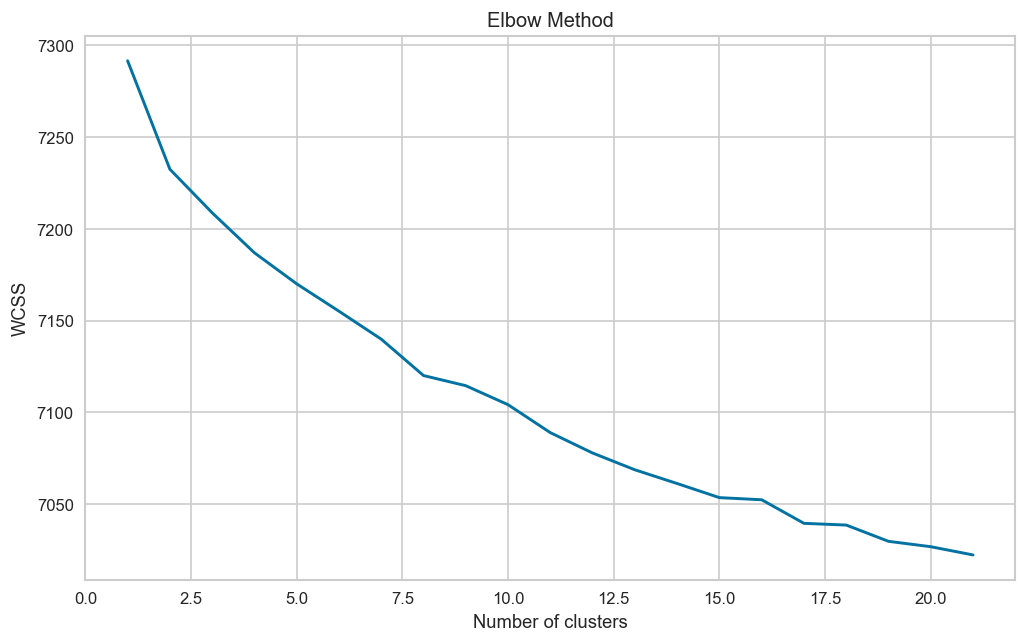

In [90]:
plt.figure(figsize=(10,6), dpi=120)
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Perform Clusterin considering k = 10 

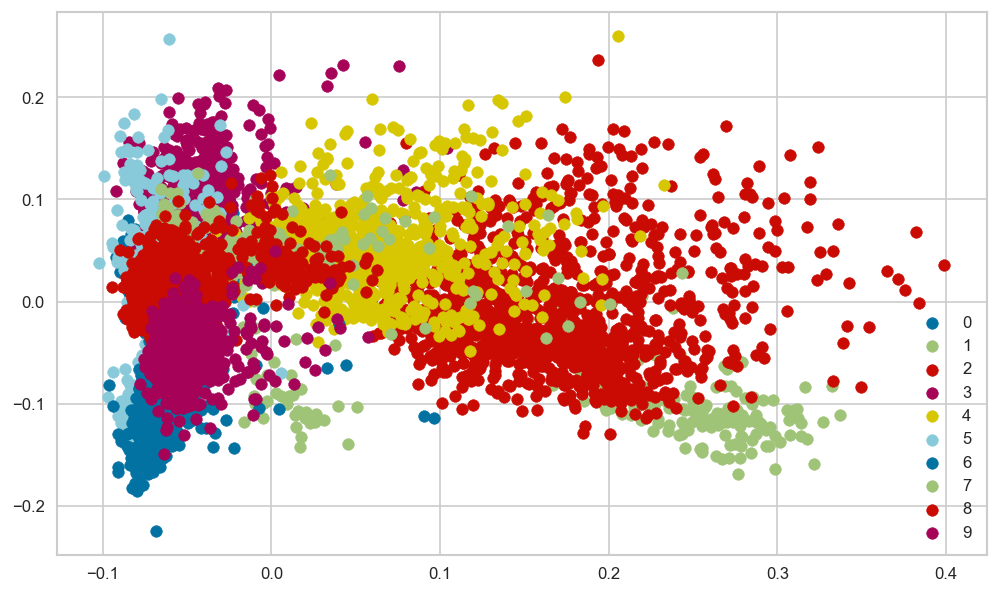

In [93]:
plt.figure(figsize=(10,6), dpi=120)

kmeans= KMeans(n_clusters=10, init= 'k-means++', random_state=9)
kmeans.fit(x_transformed)

#predict the labels of clusters.
label = kmeans.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

In [95]:
# Add cluster values to the dateframe.
df_copy['cluster_number'] = kmeans.labels_
     

In [96]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [98]:
#word cloud for user rating review
def func_select_Category(category_name,column_of_choice):
  df_word_cloud = df_copy[['cluster_number',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Plot the wordclouds
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Cluster: {i}')
  plt.axis("off")
  plt.show()

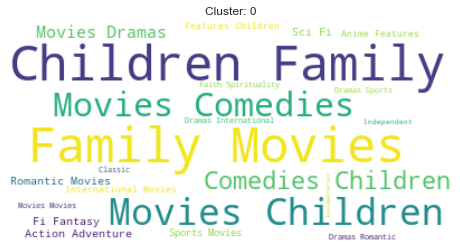

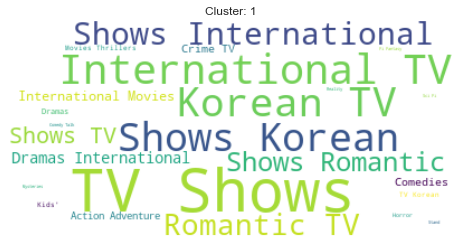

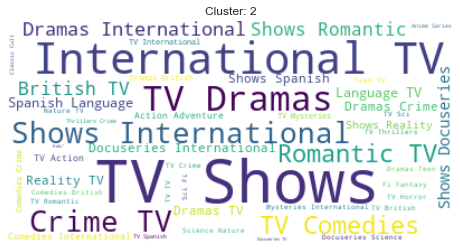

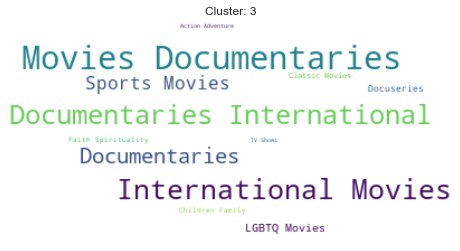

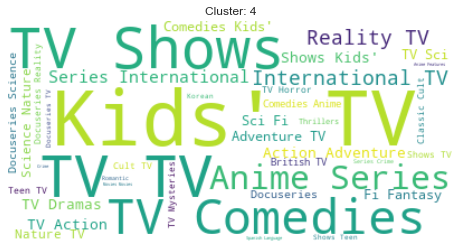

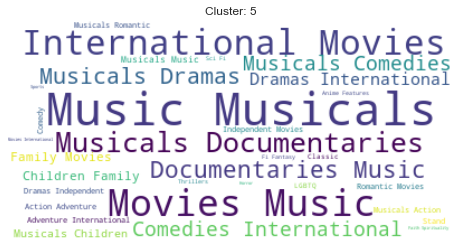

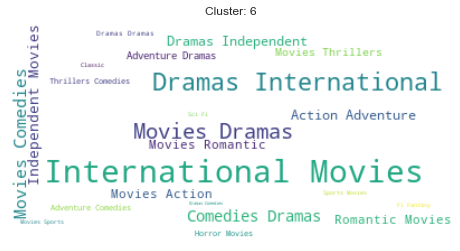

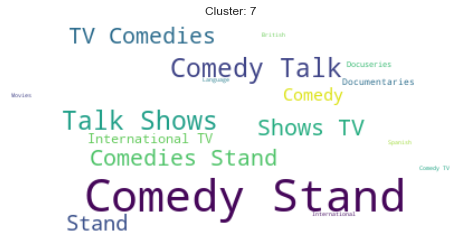

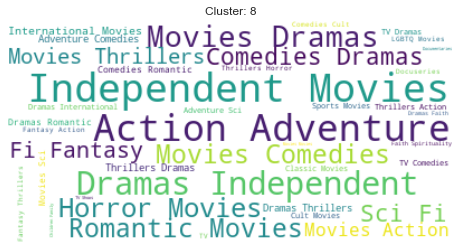

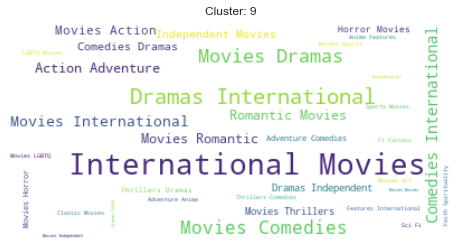

In [99]:
for i in range(10):
  func_select_Category(i,'listed_in')

#### Get Recommendations 

In [100]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [104]:
t_vectorizer = TfidfVectorizer()
count_matrix = t_vectorizer.fit_transform(bag_of_words)

In [105]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.05129343, 0.01993839, ..., 0.0110439 , 0.02470374,
        0.00625002],
       [0.05129343, 1.        , 0.00550373, ..., 0.05216576, 0.00209316,
        0.00368022],
       [0.01993839, 0.00550373, 1.        , ..., 0.00754581, 0.00210037,
        0.        ],
       ...,
       [0.0110439 , 0.05216576, 0.00754581, ..., 1.        , 0.01001507,
        0.20481422],
       [0.02470374, 0.00209316, 0.00210037, ..., 0.01001507, 1.        ,
        0.02839334],
       [0.00625002, 0.00368022, 0.        , ..., 0.20481422, 0.02839334,
        1.        ]])

In [106]:
indices = pd.Series(cluster_df.index)
indices[:5]

0       3%
1     7:19
2    23:59
3        9
4       21
Name: title, dtype: object

In [107]:
# function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(Title, cosine_sim = cosine_sim):
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == Title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(cluster_df.index)[i])
        
    return recommended_movies

In [123]:
# Lets try getting recommendations for Movies.
movie_recommendations = pd.DataFrame(recommendations('Zoom'), columns=['Recommendations'])
movie_recommendations.head(11)

,Recommendations
0,Tim Allen: ReWires America
1,National Bird
2,Hedgehogs
3,Dr. Seuss' The Cat in the Hat
4,Tim Allen: Men Are Pigs
5,Longmire
6,The Last Laugh
7,Dance Dreams: Hot Chocolate Nutcracker
8,Friends
9,Marvel's The Punisher


In [116]:
# Lets try getting recommendations for Tv-Shows.
tvshows_recommendations = pd.DataFrame(recommendations('13 Reasons Why'), columns=['Recommendations'])
tvshows_recommendations.head(11)

,Recommendations
0,13 Reasons Why: Beyond the Reasons
1,The Staircase
2,Unsolved Mysteries
3,Mind Game
4,The Mist
5,Twice Upon A Time
6,We Are the Wave
7,Re:Mind
8,The Sinner
9,Disappearance


### Conclusions : 
##### * Most of these content are released in either in the year ending or the beginning 
##### * It was interesting to find that majority of the content available on Netflix is Movies 
##### * But in the recent years ut has been focusing more on Tv_shows 
##### * TV-MA tops the charts indicating that mature content is more popular on Netflix 
##### * K =10 was found to be an optimtal value for cluster using which we grouped our data into 10 distinct clusters 
##### * Using the given data a simple recomeender system was created using cosine similarity and recommendation for Movies and TV shows were obtained 